<h1>Data Analysis of Twitter Data<h1>

<h3>Collecting Data</h3>

Importing the Processed Tweet Data that was done through extract_datafram.py script 

In [144]:
import os
import sys
import inspect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import numpy as np
import string

processed_tweets = pd.read_csv('../data/processed_tweet_data.csv')
processed_tweets.head()

,created_at,source,original_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.177778,0.166667,0.188889,en,548,612,ketuesriche,551,351,NaN,NaN,TelGlobalHealth,Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.294444,0.133333,0.455556,en,195,92,Grid1949,66,92,NaN,NaN,WHOAFRO,"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.400000,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,NaN,red4research,globalhlthtwit,NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.141667,0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,NaN,NaN,NHSRDForum,NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.450000,0.280000,0.620000,en,72,20,pash22,28250,30819,NaN,NaN,Research2note,United Kingdom


<h3>Exploring the Data</h3>

*   Find what columns we have
*   Find how many data we have
*   Find out what type of data there is in each column
*   Check for missing values

In [145]:
processed_tweets.columns

Index(['created_at', 'source', 'original_text', 'sentiment', 'polarity',
       'subjectivity', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place'],
      dtype='object')

In [146]:
processed_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6417 non-null   object 
 1   source              6417 non-null   object 
 2   original_text       6417 non-null   object 
 3   sentiment           6417 non-null   float64
 4   polarity            6417 non-null   float64
 5   subjectivity        6417 non-null   float64
 6   lang                6417 non-null   object 
 7   favorite_count      6417 non-null   int64  
 8   retweet_count       6417 non-null   int64  
 9   original_author     6417 non-null   object 
 10  followers_count     6417 non-null   int64  
 11  friends_count       6417 non-null   int64  
 12  possibly_sensitive  15 non-null     object 
 13  hashtags            2607 non-null   object 
 14  user_mentions       6417 non-null   object 
 15  place               4013 non-null   object 
dtypes: flo

In [147]:
processed_tweets.shape

(6417, 16)

Check for missing values

In [148]:
print("The number of missing value(s) based on columns:\n{}".format(processed_tweets.isnull().sum()))
print("The number of missing value(s): {}".format(processed_tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(processed_tweets.columns[processed_tweets.isnull().any()]))

The number of missing value(s) based on columns:
created_at               0
source                   0
original_text            0
sentiment                0
polarity                 0
subjectivity             0
lang                     0
favorite_count           0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    6402
hashtags              3810
user_mentions            0
place                 2404
dtype: int64
The number of missing value(s): 12616
Columns having missing value(s):Index(['possibly_sensitive', 'hashtags', 'place'], dtype='object')


<h3>Data Preparation </h3>

*   Making correction 
*   Reformatting
*   Combining Dataset

In [149]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 


In [150]:
from clean_tweets_dataframe import Clean_Tweets

Chossing what which data is neccessary for our model

In [151]:
tweets_df = pd.DataFrame(columns=['original_text','sentiment','lang','hashtags'])

tweets_df['original_text'] =  processed_tweets['original_text'].to_list()
tweets_df['sentiment'] =  processed_tweets['sentiment'].to_list()
tweets_df['lang'] = processed_tweets['lang'].to_list()
tweets_df['hashtags'] = processed_tweets['hashtags'].to_list()

tweets_df.head()

,original_text,sentiment,lang,hashtags
0,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.177778,en,NaN
1,RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.294444,en,NaN
2,RT @NHSRDForum: Thank you @research2note for c...,0.400000,en,red4research
3,RT @HighWireTalk: Former Pfizer VP and Virolog...,0.141667,en,NaN
4,RT @PeterHotez: I think it’s important that we...,0.450000,en,NaN


In [152]:
tweet_cleaner = Clean_Tweets()
tweet_cleaner.add_clean_text(tweets_df)
tweets_df

Automation in Action...!!!


,original_text,sentiment,lang,hashtags,clean_text
0,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.177778,en,NaN,RT TelGlobalHealth Africa is in the midst of a...
1,RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.294444,en,NaN,RT globalhlthtwit Dr Moeti is head of WHO in A...
2,RT @NHSRDForum: Thank you @research2note for c...,0.400000,en,red4research,RT NHSRDForum Thank you research note for crea...
3,RT @HighWireTalk: Former Pfizer VP and Virolog...,0.141667,en,NaN,RT HighWireTalk Former Pfizer VP and Virologis...
4,RT @PeterHotez: I think it’s important that we...,0.450000,en,NaN,RT PeterHotez I think it s important that we d...
...,...,...,...,...,...
6412,Pin Code:[411011] \nKamala Nehru PMCG\nVaccine...,0.000000,en,NaN,Pin Code Kamala Nehru PMCGVaccines COVAXIN Min...
6413,200-minute interview with the inventor of mRNA...,0.000000,en,Covid19,minute interview with the inventor of mRNA vac...
6414,RT @shawajason: Liars. You tried to load off y...,0.000000,en,NaN,RT shawajason Liars You tried to load off your...
6415,"RT @KalainH: As of June 17th, T&amp;T has admi...",0.250000,en,COVID19,RT KalainH As of June th T amp T has administe...


In [153]:
tweets_df = tweets_df.fillna("")
tweets_df

,original_text,sentiment,lang,hashtags,clean_text
0,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.177778,en,,RT TelGlobalHealth Africa is in the midst of a...
1,RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.294444,en,,RT globalhlthtwit Dr Moeti is head of WHO in A...
2,RT @NHSRDForum: Thank you @research2note for c...,0.400000,en,red4research,RT NHSRDForum Thank you research note for crea...
3,RT @HighWireTalk: Former Pfizer VP and Virolog...,0.141667,en,,RT HighWireTalk Former Pfizer VP and Virologis...
4,RT @PeterHotez: I think it’s important that we...,0.450000,en,,RT PeterHotez I think it s important that we d...
...,...,...,...,...,...
6412,Pin Code:[411011] \nKamala Nehru PMCG\nVaccine...,0.000000,en,,Pin Code Kamala Nehru PMCGVaccines COVAXIN Min...
6413,200-minute interview with the inventor of mRNA...,0.000000,en,Covid19,minute interview with the inventor of mRNA vac...
6414,RT @shawajason: Liars. You tried to load off y...,0.000000,en,,RT shawajason Liars You tried to load off your...
6415,"RT @KalainH: As of June 17th, T&amp;T has admi...",0.250000,en,COVID19,RT KalainH As of June th T amp T has administe...


In [154]:
tweets_df = tweet_cleaner.remove_non_english_tweets(tweets_df)
tweets_df

,original_text,sentiment,lang,hashtags,clean_text
0,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.177778,en,,RT TelGlobalHealth Africa is in the midst of a...
1,RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.294444,en,,RT globalhlthtwit Dr Moeti is head of WHO in A...
2,RT @NHSRDForum: Thank you @research2note for c...,0.400000,en,red4research,RT NHSRDForum Thank you research note for crea...
3,RT @HighWireTalk: Former Pfizer VP and Virolog...,0.141667,en,,RT HighWireTalk Former Pfizer VP and Virologis...
4,RT @PeterHotez: I think it’s important that we...,0.450000,en,,RT PeterHotez I think it s important that we d...
...,...,...,...,...,...
6412,Pin Code:[411011] \nKamala Nehru PMCG\nVaccine...,0.000000,en,,Pin Code Kamala Nehru PMCGVaccines COVAXIN Min...
6413,200-minute interview with the inventor of mRNA...,0.000000,en,Covid19,minute interview with the inventor of mRNA vac...
6414,RT @shawajason: Liars. You tried to load off y...,0.000000,en,,RT shawajason Liars You tried to load off your...
6415,"RT @KalainH: As of June 17th, T&amp;T has admi...",0.250000,en,COVID19,RT KalainH As of June th T amp T has administe...


In [155]:
tweets_df['clean_text'] =  tweets_df['clean_text'].astype(str)
tweets_df['clean_text'] =  tweets_df['clean_text'].apply(lambda x: x.lower())
tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
tweets_df['sentiment'] =  tweets_df['sentiment'].astype(float)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.lower())
tweets_df['hashtags']= tweets_df['hashtags'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [156]:
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_df.clean_text
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df

,word
0,rt
1,telglobalhealth
2,africa
3,is
4,in
...,...
136715,of
136716,covid
136717,cases
136718,in


<AxesSubplot:>

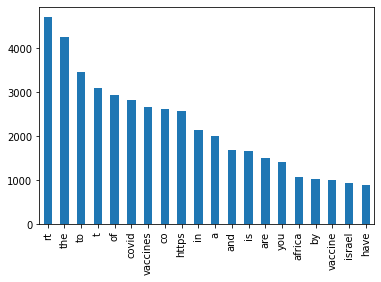

In [157]:
flattened_words_df.word.value_counts()[:20].plot(kind='bar')

In [158]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in tweets_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df

,hashtag
0,red4research
1,wecandothis
2,covid19
3,wecandothis
4,cuban
...,...
2602,covid19
2603,covid19
2604,covid19
2605,covid19


<AxesSubplot:>

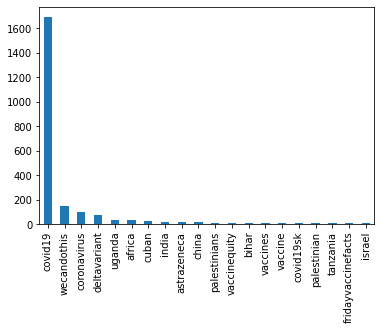

In [159]:
flattened_hashtags_df.hashtag.value_counts()[:20].plot(kind='bar')

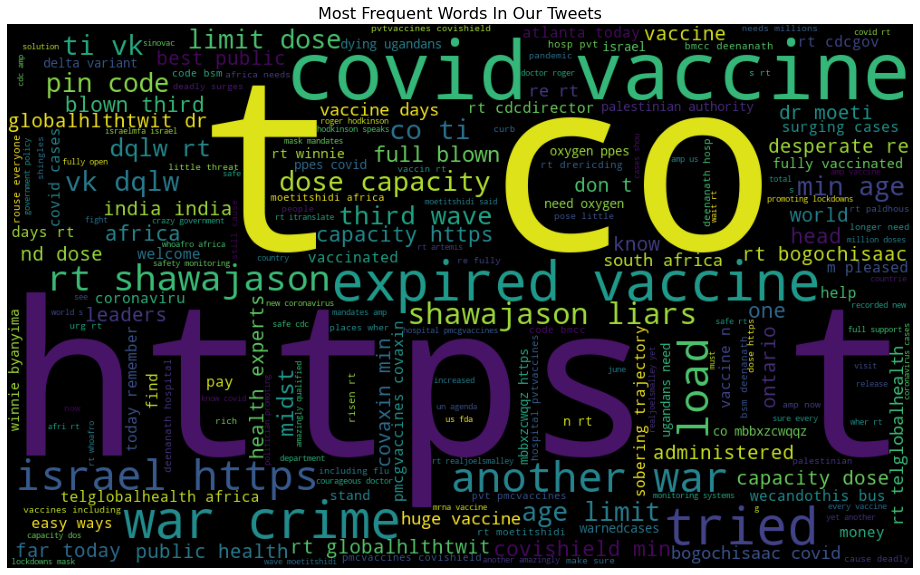

In [160]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df.clean_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [161]:
tweets_df = tweets_df.drop(['original_text'],axis=1)
tweets_df.to_csv('../data/model_ready_data.csv', index=False)
print('Model Ready Data Successfully Saved.!!!')

Model Ready Data Successfully Saved.!!!
